In [1]:
#Shubham Nigam
#19A1HP071

In [2]:
#Question1 : Logistical Regression


In [4]:
import pandas as pd  # Importing libraries
import numpy as np

In [5]:
SA_df = pd.read_csv("https://web.stanford.edu/~hastie/ElemStatLearn/datasets/SAheart.data" ) # importing data set 

In [6]:
SA_df.head() # Printing data 

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


In [7]:
SA_df=SA_df.drop('row.names', axis =1) # removing row.names as it is not important for the analysis

In [8]:
SA_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sbp        462 non-null    int64  
 1   tobacco    462 non-null    float64
 2   ldl        462 non-null    float64
 3   adiposity  462 non-null    float64
 4   famhist    462 non-null    object 
 5   typea      462 non-null    int64  
 6   obesity    462 non-null    float64
 7   alcohol    462 non-null    float64
 8   age        462 non-null    int64  
 9   chd        462 non-null    int64  
dtypes: float64(5), int64(4), object(1)
memory usage: 36.2+ KB


In [9]:
SA_df.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


In [10]:
SA_df.chd.value_counts() # printing number of variable for dependent variables

0    302
1    160
Name: chd, dtype: int64

In [11]:
X_features = list( SA_df.columns )
X_features.remove( 'chd' ) # droping dependent variables 
X_features

['sbp',
 'tobacco',
 'ldl',
 'adiposity',
 'famhist',
 'typea',
 'obesity',
 'alcohol',
 'age']

In [12]:
# Encoding independent varaibles by creating dummy variables

In [13]:
encoded_SA_df = pd.get_dummies( SA_df[X_features], drop_first = True )

In [14]:
encoded_SA_df.head()

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,famhist_Present
0,160,12.00,5.73,23.11,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,55,28.87,2.06,63,0
2,118,0.08,3.48,32.28,52,29.14,3.81,46,1
3,170,7.50,6.41,38.03,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,60,25.99,57.34,49,1


In [15]:
list(encoded_SA_df.columns)

['sbp',
 'tobacco',
 'ldl',
 'adiposity',
 'typea',
 'obesity',
 'alcohol',
 'age',
 'famhist_Present']

In [17]:
import statsmodels.api as sm
Y = SA_df.chd
X = sm.add_constant( encoded_SA_df)

In [18]:
# Splitting into train and test

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.3,random_state = 41)

In [20]:
import statsmodels.api as sm     #Creating regression model
logit = sm.Logit(y_train, X_train)
logit_model = logit.fit()

Optimization terminated successfully.
         Current function value: 0.497819
         Iterations 6


In [21]:
logit_model.summary2()   # prnting model summary 

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.235     
Dependent Variable: chd              AIC:              341.5913  
Date:               2020-09-21 13:46 BIC:              379.3678  
No. Observations:   323              Log-Likelihood:   -160.80   
Df Model:           9                LL-Null:          -210.31   
Df Residuals:       313              LLR p-value:      2.4811e-17
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
-----------------------------------------------------------------
                  Coef.  Std.Err.    z    P>|z|   [0.025   0.975]
-----------------------------------------------------------------
const            -7.8881   1.6282 -4.8448 0.0000 -11.0793 -4.6970
sbp              -0.0004   0.0072 -0.0509 0.9594  -0.0145  0.0138
tobacco           0.0791   0.0306  2.5856 0.0097   0.0191  0.1390
ldl               0.2386   0.0772  3.0885 0.0020   0.0872  0.3900
adiposity        -0.0027   0.0349 -0.0764 0.9391  -0.0710  0.0657
typea             0.0587   0.0154  3.8035 0.0001   0.0284  0.0889
obesity          -0.0057   0.0497 -0.1157 0.9079  -0.1031  0.0916
alcohol          -0.0011   0.0057 -0.1962 0.8444  -0.0124  0.0101
age               0.0570   0.0153  3.7135 0.0002   0.0269  0.0870
famhist_Present   0.7815   0.2770  2.8210 0.0048   0.2385  1.3245
=================================================================

"""

In [22]:
# Model is significant as the p value is less than 0.05


In [23]:
#creating a function to extract significant parameters in the model
def get_significant_vars( lm ):
    var_p_vals_df = pd.DataFrame( lm.pvalues ) 
    var_p_vals_df['vars'] = var_p_vals_df.index
    var_p_vals_df.columns = ['pvals', 'vars']
    return list( var_p_vals_df[var_p_vals_df.pvals <= 0.05]['vars'] )

In [24]:
significant_vars = get_significant_vars( logit_model ) # passing the funtion and printing signifact variables
significant_vars

['const', 'tobacco', 'ldl', 'typea', 'age', 'famhist_Present']

In [25]:
final_logit = sm.Logit( y_train,sm.add_constant( X_train[significant_vars] ) ).fit() # Creating model with only significant parameters

Optimization terminated successfully.
         Current function value: 0.497998
         Iterations 6


In [26]:
# the function is increased slightly 

In [27]:
final_logit.summary2() # printing model summary y_pred_df = pd.DataFrame( { "actual": y_test,"predicted_prob": final_logit.predict(sm.add_constant( X_test[significant_vars] ) ) } )

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.235     
Dependent Variable: chd              AIC:              333.7066  
Date:               2020-09-21 13:50 BIC:              356.3725  
No. Observations:   323              Log-Likelihood:   -160.85   
Df Model:           5                LL-Null:          -210.31   
Df Residuals:       317              LLR p-value:      8.9842e-20
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
-----------------------------------------------------------------
                  Coef.  Std.Err.    z    P>|z|   [0.025   0.975]
-----------------------------------------------------------------
const            -8.0797   1.2177 -6.6351 0.0000 -10.4663 -5.6930
tobacco           0.0782   0.0303  2.5808 0.0099   0.0188  0.1375
ldl               0.2331   0.0708  3.2944 0.0010   0.0944  0.3718
typea             0.0582   0.0153  3.7916 0.0001   0.0281  0.0883
age               0.0559   0.0128  4.3563 0.0000   0.0307  0.0810
famhist_Present   0.7838   0.2763  2.8367 0.0046   0.2423  1.3254
=================================================================

"""

In [ ]:
# predicting on test data

In [28]:
y_pred_df = pd.DataFrame( { "actual": y_test,"predicted_prob": final_logit.predict(sm.add_constant( X_test[significant_vars] ) ) } )

In [29]:
y_pred_df.sample(10, random_state = 41)

,actual,predicted_prob
252,1,0.306766
36,0,0.175791
20,1,0.106748
239,0,0.047458
446,1,0.080356
27,1,0.667166
70,0,0.031734
317,0,0.059878
0,1,0.675950
374,0,0.260698


In [30]:
y_pred_df['predicted'] = y_pred_df.predicted_prob.map(lambda x: 1 if x > 0.5 else 0)
y_pred_df.sample(10, random_state = 41)      #printing odds

,actual,predicted_prob,predicted
252,1,0.306766,0
36,0,0.175791,0
20,1,0.106748,0
239,0,0.047458,0
446,1,0.080356,0
27,1,0.667166,1
70,0,0.031734,0
317,0,0.059878,0
0,1,0.675950,1
374,0,0.260698,0


In [31]:
import matplotlib.pyplot as plt  # inserting libraries to import funtion for graphical representation
import seaborn as sn
%matplotlib inline
from sklearn import metrics

In [32]:
def draw_cm( actual, predicted ):  # creating confusion matrics
    ## Cret
    cm = metrics.confusion_matrix( actual, predicted, [1,0] )
    sn.heatmap(cm, annot=True, fmt='.2f',
        xticklabels = ["Recovered", "Not-recovered"] ,
        yticklabels = ["Recovered", "Not-recovered"] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

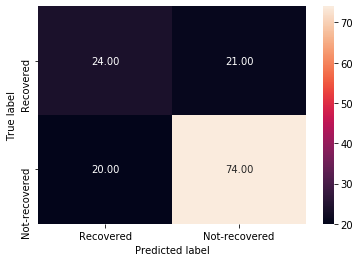

In [33]:
draw_cm( y_pred_df.actual,y_pred_df.predicted )

In [34]:

print( metrics.classification_report( y_pred_df.actual,y_pred_df.predicted ) )

              precision    recall  f1-score   support

           0       0.78      0.79      0.78        94
           1       0.55      0.53      0.54        45

    accuracy                           0.71       139
   macro avg       0.66      0.66      0.66       139
weighted avg       0.70      0.71      0.70       139



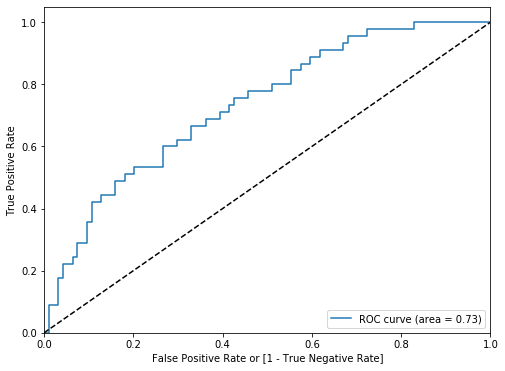

In [36]:
def draw_roc( actual, probs ):    # creating roc curve
    fpr, \
    tpr, \
    thresholds = metrics.roc_curve( actual,probs, drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(8, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()
    return fpr, tpr, thresholds
fpr, tpr, thresholds = draw_roc( y_pred_df.actual,y_pred_df.predicted_prob)

In [37]:
auc_score = metrics.roc_auc_score( y_pred_df.actual,y_pred_df.predicted_prob )
round( float( auc_score ), 2 )

0.73

In [ ]:
# Optimizing using yudens matix

In [38]:
tpr_fpr = pd.DataFrame( { 'tpr': tpr,'fpr': fpr,'thresholds': thresholds } )
tpr_fpr['diff'] = tpr_fpr.tpr - tpr_fpr.fpr
tpr_fpr.sort_values( 'diff', ascending = False )[0:5] # arranging difference in descendin order

,tpr,fpr,thresholds,diff
61,0.666667,0.329787,0.355069,0.336879
52,0.600000,0.265957,0.440959,0.334043
43,0.533333,0.202128,0.507491,0.331206
40,0.511111,0.180851,0.525241,0.330260
74,0.755556,0.425532,0.299512,0.330024


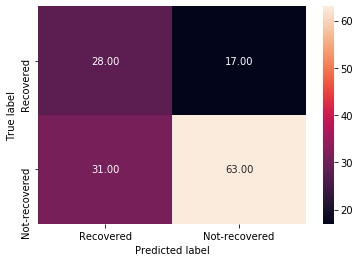

In [39]:
y_pred_df['predicted_new'] = y_pred_df.predicted_prob.map(lambda x: 1 if x > 0.36 else 0) # taking threshold as .36 as its is the threshold for max calue
draw_cm( y_pred_df.actual,y_pred_df.predicted_new)    # creating confusion matrix

In [40]:
print(metrics.classification_report( y_pred_df.actual,y_pred_df.predicted_new ))

              precision    recall  f1-score   support

           0       0.79      0.67      0.72        94
           1       0.47      0.62      0.54        45

    accuracy                           0.65       139
   macro avg       0.63      0.65      0.63       139
weighted avg       0.69      0.65      0.66       139



In [ ]:
# Cost based approach 

In [41]:
def get_total_cost( actual, predicted, cost_FPs, cost_FNs ):
    cm = metrics.confusion_matrix( actual, predicted, [1,0] )
    cm_mat = np.array( cm )
    return cm_mat[0,1] * cost_FNs + cm_mat[1,0] * cost_FPs

In [42]:
cost_df = pd.DataFrame( columns = ['prob', 'cost'])

In [43]:
idx = 0
## iterate cut-off probability values between 0.1 and 0.5
for each_prob in range( 10, 50):
    cost = get_total_cost( y_pred_df.actual,y_pred_df.predicted_prob.map(lambda x: 1 if x > (each_prob/100) else 0), 1, 5 )
    cost_df.loc[idx] = [(each_prob/100), cost]
    idx += 1

In [44]:
cost_df.sort_values( 'cost', ascending = True )[0:5]

,prob,cost
0,0.10,75.0
2,0.12,80.0
3,0.13,80.0
1,0.11,82.0
4,0.14,83.0


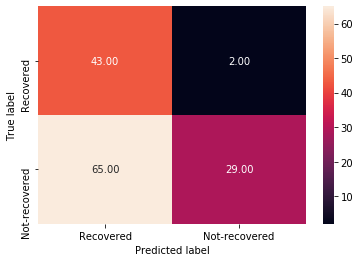

In [46]:
y_pred_df['predicted_using_cost'] = y_pred_df.predicted_prob.map(lambda x: 1 if x > 0.1 else 0) # cutoff as .10 as cost is minimum at this probablity 
draw_cm( y_pred_df.actual,y_pred_df.predicted_using_cost )

In [47]:
print(metrics.classification_report( y_pred_df.actual,y_pred_df.predicted_using_cost ))


              precision    recall  f1-score   support

           0       0.94      0.31      0.46        94
           1       0.40      0.96      0.56        45

    accuracy                           0.52       139
   macro avg       0.67      0.63      0.51       139
weighted avg       0.76      0.52      0.50       139



In [ ]:
#Ans b) cut- off frequency is 0.36
#d) cut-off frequency is 0.10